In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Uni-variate Anlaysis**

**Gender**

In [6]:
df['gender']

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [11]:
counts = df['gender'].value_counts()
percents = df['gender'].value_counts(normalize=True) * 100

In [10]:
counts

gender
female    518
male      482
Name: count, dtype: int64

In [12]:
percents

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [19]:
freq_table = pd.DataFrame({'Frequency':counts, 'Percentage %':percents})
freq_table

,Frequency,Percentage %
gender,,
female,518,51.8
male,482,48.2


<Axes: xlabel='gender'>

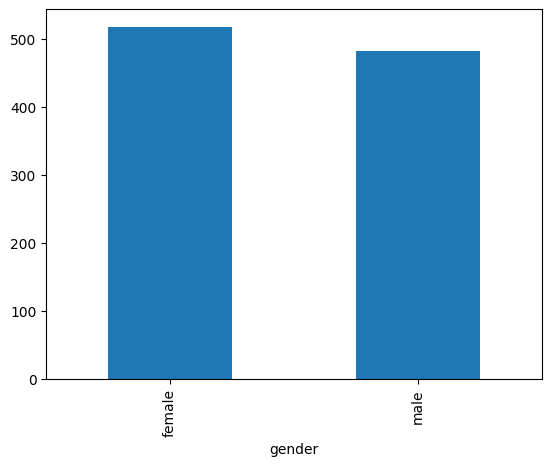

In [21]:
counts.plot(kind='bar')

In [28]:
df['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [30]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


<Axes: ylabel='Frequency'>

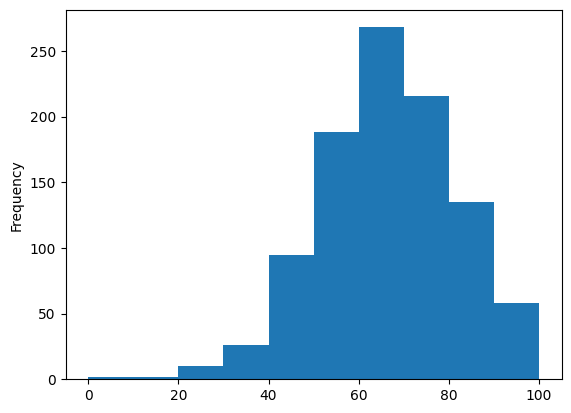

In [31]:
df['math score'].plot(kind='hist')

<Axes: ylabel='Density'>

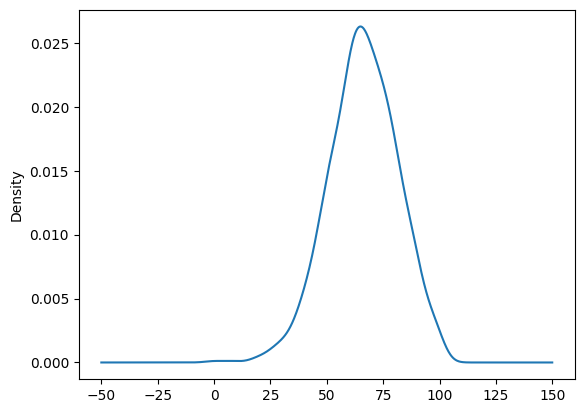

In [32]:
df['math score'].plot(kind='kde')

In [33]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
d = {'Id':[1, 2, 3], 'Name':['ali', 'amr', 'omar']}
d

{'Id': [1, 2, 3], 'Name': ['ali', 'amr', 'omar']}

In [37]:
if 'Country' in d:
    print('a')

In [44]:
df[(df['math score'] <= 50) | (df['reading score'] <= 50)].head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
11,male,group D,associate's degree,standard,none,40,52,43
14,female,group A,master's degree,standard,none,50,53,58
17,female,group B,some high school,free/reduced,none,18,32,28


In [46]:
df.groupby(["parental level of education"])['math score'].max()

parental level of education
associate's degree    100
bachelor's degree     100
high school            99
master's degree        95
some college          100
some high school       97
Name: math score, dtype: int64

In [51]:
df.groupby(['race/ethnicity', 'lunch'])['gender'].value_counts()

race/ethnicity  lunch         gender
group A         free/reduced  male       22
                              female     14
                standard      male       31
                              female     22
group B         free/reduced  female     39
                              male       30
                standard      female     65
                              male       56
group C         free/reduced  female     62
                              male       52
                standard      female    118
                              male       87
group D         free/reduced  female     51
                              male       44
                standard      male       89
                              female     78
group E         free/reduced  female     23
                              male       18
                standard      male       53
                              female     46
Name: count, dtype: int64

In [48]:
df.groupby(['gender', ])['race/ethnicity'].value_counts()

gender  race/ethnicity
female  group C           180
        group D           129
        group B           104
        group E            69
        group A            36
male    group C           139
        group D           133
        group B            86
        group E            71
        group A            53
Name: count, dtype: int64

In [50]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
